In [14]:
import pandas as pd
import numpy as np
import os
import json
import csv
import requests
import prepare
import unicodedata
import string
from env import github_token, github_username
import time
import random
from bs4 import BeautifulSoup
from requests import get
import acquire
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [2]:
# Paste your Access token here
# To create an access token - https://github.com/settings/tokens
token = github_token + github_username

# Base API Endpoint
base_api_url = 'https://api.github.com/'

In [7]:
# Enter multiple word queries with a '+' sign
# Ex: machine+learning to search for Machine Learning

print('codeup')

query = input()
print('\n Query entered is', query, '\n')

search_final_url = base_api_url + 'search/repositories?q=' + query + '&' + token

codeup

 Query entered is codeup 



In [5]:
# A CSV file containting the data would be saved with the name as the query
# Ex: machine+learning.csv
filename = query + '.csv'

# Create a CSV file or clear the existing one with the same name
with open(filename, 'w', newline='') as csvfile:
    write_to_csv = csv.writer(csvfile, delimiter='|')

In [14]:
# GitHub returns information of only 30 repositories with every request
# The Search API Endpoint only allows upto 1000 results, hence the range has been set to 35
for page in range(1, 35):

    # Building the Search API URL
    search_final_url = base_api_url + 'search/repositories?q=' + \
        query + '&page=' + str(page) + '&' + token

    # try-except block just incase you set up the range in the above for loop beyond 35
    try:
        response = requests.get(search_final_url).json()
    except:
        print("Issue with GitHub API, Check your token")

    # Parsing through the response of the search query
    for item in response['items']:
        #print(response['items'])
        # Append to the CSV file
        with open(filename, 'a', newline='') as csvfile:
            write_to_csv = csv.writer(csvfile, delimiter='|')

            repo_name = item['name']
            repo_user = item['full_name']
            # repo_description = item['description']
            # repo_stars = item['stargazers_count']
            # repo_watchers = item['watchers_count']
            # repo_forks = item['forks_count']
            # repo_issues_count = item['open_issues_count']
            # repo_main_language = item['language']
            # repo_license = None
            # # repo_score is the relevancy score of a repository to the search query
            # # Reference - https://developer.github.com/v3/search/#ranking-search-results
            # repo_score = item['score']

            # Many Repositories don't have a license, this is to filter them out
            if item['license']:
                repo_license = item['license']['name']
            else:
                repo_license = "NO LICENSE"

            # Just incase, you face any issue with GitHub API Rate Limiting, use the sleep function as a workaround
            # Reference - https://developer.github.com/v3/search/#rate-limit

            # time.sleep(10)

            # # Languages URL to access all the languages present in the repository
            # language_url = item['url'] + '/languages?' + token
            # language_response = requests.get(language_url).json()

            # repo_languages = {}

            # # Calculation for the percentage of all the languages present in the repository
            # count_value = sum([value for value in language_response.values()])
            # for key, value in language_response.items():
            #     key_value = round((value / count_value) * 100, 2)
            #     repo_languages[key] = key_value
            print("Repo Name = ", repo_name, "Title", repo_user, "User")
            
            # , repo_description, "\tStars = ", repo_stars, "\tWatchers = ", repo_watchers, "\tForks = ", repo_forks,
            #       "\tOpen Issues = ", repo_issues_count, "\tPrimary Language = ", repo_main_language, "\tRepo Languages =", repo_languages, '\tRepo Score', repo_score)

            # Write as a row to the CSV file
            write_to_csv.writerow([repo_name, repo_user]) 
            
            # repo_description, repo_stars, repo_watchers, repo_forks,
            #                        repo_license, repo_issues_count, repo_score, repo_main_language, repo_languages])

            print('==========')

Repo Name =  cods Title zgulde/cods User
Repo Name =  codeup_challenges Title gocodeup/codeup_challenges User
Repo Name =  codeup Title maximusyoung007/codeup User
Repo Name =  java-101-exercises Title CodeupClassroom/java-101-exercises User
Repo Name =  london-ethereum-codeup Title makoto/london-ethereum-codeup User
Repo Name =  CodeUp Title Henriettas-Army/CodeUp User
Repo Name =  codeupleeds.github.io Title francisedwards/codeupleeds.github.io User
Repo Name =  karaoke-mock-java-assessment Title jreich5/karaoke-mock-java-assessment User
Repo Name =  codeup-game Title davros1973/codeup-game User
Repo Name =  codeup-setup-script Title zgulde/codeup-setup-script User
Repo Name =  Algorithm-note-for-Codeup Title Miroier/Algorithm-note-for-Codeup User
Repo Name =  caseys-burger-shop Title CodeupClassroom/caseys-burger-shop User
Repo Name =  ssl-helper Title zgulde/ssl-helper User
Repo Name =  spring-blog Title fmendozaro/spring-blog User
Repo Name =  CodeUp100_Challenge Title CodeUp100Ch

KeyError: 'items'

In [2]:
df = pd.read_csv('data.csv')

In [25]:
repos.head(25)

,repos
0,freeCodeCamp/freeCodeCamp
1,996icu/996.ICU
2,jwasham/coding-interview-university
3,kamranahmedse/developer-roadmap
4,public-apis/public-apis
5,vuejs/vue
6,donnemartin/system-design-primer
7,facebook/react
8,tensorflow/tensorflow
9,getify/You-Dont-Know-JS


In [30]:
repo_list = repos.repos.tolist()

In [32]:
repo_list

['freeCodeCamp/freeCodeCamp',
 '996icu/996.ICU',
 'jwasham/coding-interview-university',
 'kamranahmedse/developer-roadmap',
 'public-apis/public-apis',
 'vuejs/vue',
 'donnemartin/system-design-primer',
 'facebook/react',
 'tensorflow/tensorflow',
 'getify/You-Dont-Know-JS',
 'CyC2018/CS-Notes',
 'trekhleb/javascript-algorithms',
 'ohmyzsh/ohmyzsh',
 'flutter/flutter',
 'TheAlgorithms/Python',
 'vinta/awesome-python',
 'github/gitignore',
 'torvalds/linux',
 'microsoft/vscode',
 'airbnb/javascript',
 'jackfrued/Python-100-Days',
 'labuladong/fucking-algorithm',
 'facebook/react-native',
 'electron/electron',
 'golang/go',
 'd3/d3',
 '30-seconds/30-seconds-of-code',
 'awesome-selfhosted/awesome-selfhosted',
 'facebook/create-react-app',
 'axios/axios',
 'vercel/next.js',
 'kubernetes/kubernetes',
 'nodejs/node',
 'avelino/awesome-go',
 'denoland/deno',
 'microsoft/terminal',
 'mrdoob/three.js',
 'microsoft/TypeScript',
 'angular/angular',
 'ant-design/ant-design',
 'goldbergyoni/nodebe

In [2]:
data = acquire.scrape_github_data()

In [6]:
data = pd.DataFrame(data)

In [3]:
data.head()

NameError: name 'data' is not defined

In [8]:
data = data.drop_duplicates()

In [9]:
data.shape

(125, 3)

In [3]:
df.head()

,repo,language,readme_contents
0,freeCodeCamp/freeCodeCamp,TypeScript,[![freeCodeCamp Social Banner](https://s3.amaz...
1,996icu/996.ICU,NaN,[996.ICU](https://996.icu/#/en_US)\n=======\n*...
2,EbookFoundation/free-programming-books,NaN,# List of Free Learning Resources In Many Lang...
3,jwasham/coding-interview-university,NaN,# Coding Interview University\n\n> I originall...
4,kamranahmedse/developer-roadmap,TypeScript,"<p align=""center"">\n <img src=""public/brand.p..."


In [3]:
df.shape

(1031, 3)

In [3]:
stop_words = set(stopwords.words("english"))

In [8]:
def preprocess_text(text):
    text = text.lower()
    # Remove urls
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet
    text = re.sub(r'\@\w+|\#','', text)
    # Remove punctuations
   
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove stopwords
    text_tokens = word_tokenize
    filtered_words = [w for w in text_tokens if not w in stop_words]
    
    #ps = PorterStemmer()
    #stemmed_words = [ps.stem(w) for w in filtered_words]
    #lemmatizer = WordNetLemmatizer()
    #lemma_words = [lemmatizer.lemmatize(w, pos='a') for w in stemmed_words]
    
    return " ".join(filtered_words)


In [15]:
df.head()

,repo,language,readme_contents
0,freeCodeCamp/freeCodeCamp,TypeScript,[![freeCodeCamp Social Banner](https://s3.amaz...
1,996icu/996.ICU,NaN,[996.ICU](https://996.icu/#/en_US)\n=======\n*...
2,EbookFoundation/free-programming-books,NaN,# List of Free Learning Resources In Many Lang...
3,jwasham/coding-interview-university,NaN,# Coding Interview University\n\n> I originall...
4,kamranahmedse/developer-roadmap,TypeScript,"<p align=""center"">\n <img src=""public/brand.p..."


In [6]:
df.dtypes

repo               object
language           object
readme_contents    object
dtype: object

In [3]:
df['readme_contents'] =  df['readme_contents'].astype('string')

In [4]:
df.head()

,repo,language,readme_contents
0,freeCodeCamp/freeCodeCamp,TypeScript,[![freeCodeCamp Social Banner](https://s3.amaz...
1,996icu/996.ICU,NaN,[996.ICU](https://996.icu/#/en_US) ======= **P...
2,EbookFoundation/free-programming-books,NaN,# List of Free Learning Resources In Many Lang...
3,jwasham/coding-interview-university,NaN,# Coding Interview University > I originally ...
4,kamranahmedse/developer-roadmap,TypeScript,"<p align=""center""> <img src=""public/brand.pn..."


In [5]:
df.dtypes

repo               object
language           object
readme_contents    string
dtype: object

In [10]:
df.readme_contents.isnull().sum()

4

In [6]:
df.readme_contents = df.readme_contents.fillna('')

In [12]:
df.readme_contents.isnull().sum()

0

In [22]:
df.dtypes

repo               object
language           object
readme_contents    string
dtype: object

In [7]:
df['readme_contents'] = df['readme_contents'].map(lambda x: prepare.basic_clean(x))

In [9]:
df['readme_contents'] = df['readme_contents'].map(lambda x: prepare.tokenize(x))

In [10]:
df['readme_contents'] = df['readme_contents'].map(lambda x: prepare.stem(x))

In [11]:
df.head(15)

,repo,language,readme_contents
0,freeCodeCamp/freeCodeCamp,TypeScript,freecodecamp social request sourc freecodecamp...
1,996icu/996.ICU,NaN,note that there exist no other offici account ...
2,EbookFoundation/free-programming-books,NaN,list of free learn resourc in mani aligncent c...
3,jwasham/coding-interview-university,NaN,code interview i origin creat thi as a short t...
4,kamranahmedse/developer-roadmap,TypeScript,p img srcpublicbrandpng h2 p aligncentercommun...
5,public-apis/public-apis,Python,div h1public ia collect list of free api for u...
6,vuejs/vue,TypeScript,p aligncentera href target_blank relnoopen nor...
7,facebook/react,JavaScript,react middot github licens npm version circlec...
8,tensorflow/tensorflow,C++,div img best is an endtoend open sourc machin ...
9,twbs/bootstrap,JavaScript,p a img src altbootstrap logo width200 sleek i...


In [12]:
df.language.value_counts()

JavaScript          232
Python              114
TypeScript          110
Go                   78
Java                 70
C++                  56
C                    30
HTML                 23
Shell                22
Rust                 21
Swift                18
Ruby                 18
PHP                  14
Jupyter Notebook     14
C#                   13
CSS                  12
Kotlin               12
Vue                   8
Objective-C           5
Dart                  4
Lua                   4
Vim script            3
Haskell               3
SCSS                  3
TeX                   3
Markdown              3
Clojure               2
Elixir                2
Vim Script            2
Makefile              2
Batchfile             1
OCaml                 1
Julia                 1
CoffeeScript          1
Objective-C++         1
AsciiDoc              1
Emacs Lisp            1
Roff                  1
Jinja                 1
Nunjucks              1
V                     1
Dockerfile      

In [13]:
df.language.nunique()

46

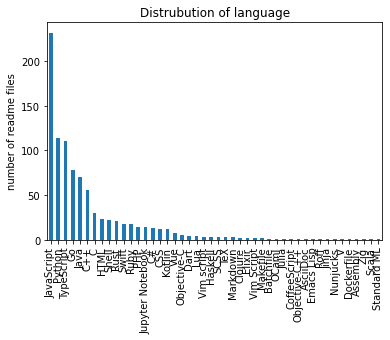

In [15]:
df.language.value_counts().plot.bar()
plt.title('Distrubution of language')
plt.ylabel('number of readme files')
plt.show()

In [16]:
trimmed_df = df[df['language'].value_counts() > 10]

/var/folders/ph/3fq5z80j5qjd537qn7g5pphc0000gn/T/ipykernel_39475/1362722525.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  trimmed_df = df[df['language'].value_counts() > 10]


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [17]:
labels = pd.concat([df.language.value_counts(),
                    df.language.value_counts(normalize=True)], axis=1)
labels.columns = ['n', 'percent']
labels

,n,percent
JavaScript,232,0.252999
Python,114,0.124318
TypeScript,110,0.119956
Go,78,0.085060
Java,70,0.076336
C++,56,0.061069
C,30,0.032715
HTML,23,0.025082
Shell,22,0.023991
Rust,21,0.022901
